# Image dimensions, gratings

In [1]:
import IPython
import ipywidgets as iw
from stimuli.utils import plot_stimuli

## Dimensions

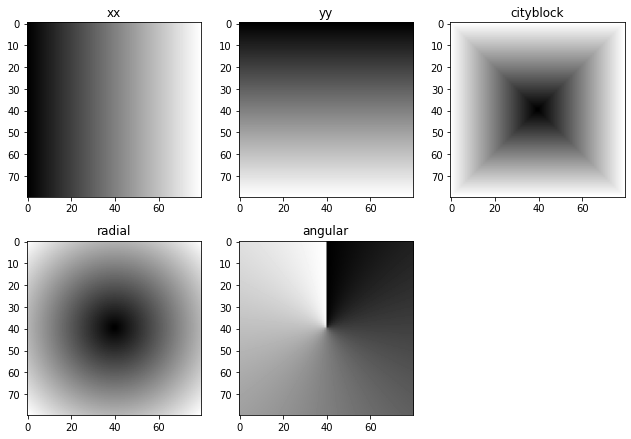

In [2]:
from stimuli.components.components import image_base

visual_size = (8., 8.)
ppd = 10

base = image_base(visual_size=visual_size, ppd=ppd)

stimuli = {key: {"img": value} for key, value in base.items() if key not in ["x", "y"]}

plot_stimuli(stimuli, vmin=None, vmax=None)

## Gratings are parameterized along single dimension

In [3]:
from stimuli.components.components import resolve_grating_params
help(resolve_grating_params)

Help on function resolve_grating_params in module stimuli.components.components:

resolve_grating_params(length=None, visual_angle=None, ppd=None, frequency=None, n_phases=None, phase_width=None, period='ignore')
    Resolve (if possible) spatial parameters for a grating
    
    Gratings take the regular resolution parameters (shape, ppd, visual_size).
    In addition, there has to be an additional specification
    of the frequency, number and with of phases (e.g., bars).
    This can be done in two ways:
    a phase_width (in degrees) and n_phases,
    and/or by specifying the spatial frequency of the grating (in cycles per degree)
    
    The total shape (in pixels) and visual size (in degrees) has to match the
    specification of the phases and their widths.
    Thus, not all 6 parameters have to be specified, as long as the both the resolution
    and the distribution of phases can be resolved.
    
    Note: all phases in a grating have the same width
    
    Parameters
    -

In [ ]:
# Define widgets
w_length = iw.IntSlider(value=8.0, min=1, max=10, description="heigh/width [deg]")
w_ppd = iw.IntSlider(value=32, min=1, max=64, description="ppd")

w_frequency = iw.FloatSlider(value=2.0, min=0.1, max=3.0, description="frequency")
w_phases = iw.IntSlider(value=4, min=0, max=10, description="N phases")
w_phase_width = iw.FloatSlider(value=1.0, min=0., max=4.0, description="phase_width")
w_use_which = iw.SelectMultiple(options=['frequency', 'n_phases', 'phase_width'], value=['n_phases'], description='use param(s):')

w_period = iw.ToggleButtons(options=["ignore", "full", "half"], value="ignore", button_style="", description="ensure period")

# Layout
b_resolution = iw.HBox([w_length, w_ppd])
b_grating_params = iw.VBox([iw.HBox([w_use_which, iw.VBox([w_frequency, w_phases, w_phase_width])]),w_period])
ui = iw.VBox([b_resolution, b_grating_params])

# Function for resolving
def resolve_params(
    length=None,
    visual_angle=None,
    ppd=None,
    frequency=None,
    n_phases=None,
    phase_width=None,
    period="ignore",
    use_params=None,
):
    params = resolve_grating_params(
        length=length,
        visual_angle=visual_angle,
        ppd=ppd,
        frequency=frequency if "frequency" in use_params else None,
        n_phases=n_phases if "n_phases" in use_params else None,
        phase_width=phase_width if "phase_width" in use_params else None,
        period=period,
    )
    print(params)


# Set interactivity
out = iw.interactive_output(
    resolve_params,
    {
        "visual_angle": w_length,
        "ppd": w_ppd,
        "frequency": w_frequency,
        "n_phases": w_phases,
        "phase_width": w_phase_width,
        "period": w_period,
        "use_params": w_use_which,
    },
)

# Show
display(ui, out)

In [ ]:
from stimuli.components.grating import square_wave as linear
from stimuli.components.frame import frames

# Define widgets
w_length = iw.IntSlider(value=8.0, min=1, max=10, description="heigh/width [deg]")
w_ppd = iw.IntSlider(value=32, min=1, max=64, description="ppd")

w_frequency = iw.FloatSlider(value=2.0, min=0.1, max=3.0, description="frequency")
w_phases = iw.IntSlider(value=4, min=0, max=10, description="N phases")
w_phase_width = iw.FloatSlider(value=1.0, min=0., max=4.0, description="phase_width")
w_use_which = iw.SelectMultiple(options=['frequency', 'n_phases', 'phase_width'], value=['n_phases'], description='use param(s):')
w_period = iw.ToggleButtons(options=["ignore", "full", "half"], value="ignore", button_style="", description="ensure period")

# Layout
b_resolution = iw.HBox([w_length, w_ppd])
b_grating_params = iw.VBox([iw.HBox([w_use_which, iw.VBox([w_frequency, w_phases, w_phase_width])]),w_period])
ui = iw.VBox([b_resolution, b_grating_params])

# Function for resolving
def show_gratings(
    length=None,
    visual_angle=None,
    ppd=None,
    frequency=None,
    n_phases=None,
    phase_width=None,
    period="ignore",
    use_params=None,
):
    stimuli = {
        "horizontal": linear(
            shape=(length, length),
            visual_size=(visual_angle, visual_angle),
            ppd=ppd,
            frequency=frequency if "frequency" in use_params else None,
            n_bars=n_phases if "n_phases" in use_params else None,
            bar_width=phase_width if "phase_width" in use_params else None,
            period=period,
            orientation="horizontal",
        ),
        "vertical": linear(
            shape=(length, length),
            visual_size=(visual_angle, visual_angle),
            ppd=ppd,
            frequency=frequency if "frequency" in use_params else None,
            n_bars=n_phases if "n_phases" in use_params else None,
            bar_width=phase_width if "phase_width" in use_params else None,
            period=period,
            orientation="vertical",
        ),
        "frames": frames(
            shape=(length, length),
            visual_size=(visual_angle, visual_angle),
            ppd=ppd,
            frequency=frequency if "frequency" in use_params else None,
            n_frames=n_phases if "n_phases" in use_params else None,
            frame_width=phase_width if "phase_width" in use_params else None,
            period=period,
        )
    }
    plot_stimuli(stimuli)


# Set interactivity
out = iw.interactive_output(
    show_gratings,
    {
        "visual_angle": w_length,
        "ppd": w_ppd,
        "frequency": w_frequency,
        "n_phases": w_phases,
        "phase_width": w_phase_width,
        "period": w_period,
        "use_params": w_use_which,
    },
)

# Show
display(ui, out)